In [1]:
import sys
sys.path.append('./utils')

In [4]:
#Imports
from requirements import *
import helperfunctions as helper

In [3]:
X_all = pd.read_csv("model_and_visualization/features_set_1.csv")
y_all = pd.read_csv("model_and_visualization/target_set_1.csv")
X_all = X_all.drop('Unnamed: 0',axis=1)
y_all = y_all.drop('Unnamed: 0',axis=1)

print len(X_all)
print len(y_all)
X_all.describe()


5309
5309


,word_count,long_word_count,avg_word_length_per_essay,wrong_words,no_of_domain_words,word_to_sent_ratio,num_of_characters,sentence_count,noun_count,verb_count,comma_count,punctuation_count,adjective_count,adverb_count,quotation_mark_count,spelling_mistakes
count,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000
mean,197.338105,46.362403,4.835283,45.079299,152.258806,13.492121,1532.813147,16.187983,62.791109,38.644377,10.174421,16.768318,19.873422,13.729328,3.817856,3.368243
std,116.878512,31.073141,0.351803,28.413772,90.775007,7.727928,921.793079,10.379520,37.776345,24.916955,9.545103,13.659156,13.228023,10.068848,4.964016,3.747873
min,6.000000,0.000000,3.170000,0.000000,4.000000,2.500000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,21.000000,4.600000,20.000000,74.000000,10.350000,723.000000,7.000000,31.000000,15.000000,3.000000,7.000000,9.000000,5.000000,0.000000,1.000000
50%,196.000000,42.000000,4.830000,43.000000,150.000000,12.190000,1523.000000,15.000000,61.000000,39.000000,8.000000,15.000000,18.000000,12.000000,2.000000,2.000000
75%,280.000000,66.000000,5.060000,65.000000,216.000000,14.530000,2184.000000,24.000000,88.000000,56.000000,15.000000,24.000000,28.000000,20.000000,6.000000,5.000000
max,720.000000,222.000000,6.190000,221.000000,585.000000,188.000000,5951.000000,85.000000,324.000000,196.000000,71.000000,643.000000,83.000000,61.000000,39.000000,59.000000


In [6]:
feature_columns = ["word_count","long_word_count","avg_word_length_per_essay","wrong_words","no_of_domain_words","word_to_sent_ratio","num_of_characters","sentence_count","noun_count","verb_count","comma_count","punctuation_count","adjective_count","adverb_count","quotation_mark_count","spelling_mistakes"]
feature_dict = {}
    
for f in feature_columns:
    score = helper.Evaluate(X_all,y_all,[f])
    feature_dict[f] = round(float(score)*100,4)
feature_dict

{'adjective_count': 45.6261,
 'adverb_count': 45.2507,
 'avg_word_length_per_essay': 6.1672,
 'comma_count': 29.4193,
 'long_word_count': 52.7739,
 'no_of_domain_words': 53.9887,
 'noun_count': 58.1735,
 'num_of_characters': 52.3,
 'punctuation_count': 36.6511,
 'quotation_mark_count': 16.3819,
 'sentence_count': 57.1469,
 'spelling_mistakes': 27.5325,
 'verb_count': 49.2216,
 'word_count': 52.8422,
 'word_to_sent_ratio': 3.4995,
 'wrong_words': 42.7589}

In [7]:
import operator
sorted_feature_list = sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True)

print "\t\tIndex\t Feature"
for x in range(len(sorted_feature_list)):
    print "\t\t|",x,"|\t|",sorted_feature_list[x][0],"|"
    print "\t\t--------------------------------"

objects = [x[1] for x in sorted_feature_list]


		Index	 Feature
		| 0 |	| noun_count |
		--------------------------------
		| 1 |	| sentence_count |
		--------------------------------
		| 2 |	| no_of_domain_words |
		--------------------------------
		| 3 |	| word_count |
		--------------------------------
		| 4 |	| long_word_count |
		--------------------------------
		| 5 |	| num_of_characters |
		--------------------------------
		| 6 |	| verb_count |
		--------------------------------
		| 7 |	| adjective_count |
		--------------------------------
		| 8 |	| adverb_count |
		--------------------------------
		| 9 |	| wrong_words |
		--------------------------------
		| 10 |	| punctuation_count |
		--------------------------------
		| 11 |	| comma_count |
		--------------------------------
		| 12 |	| spelling_mistakes |
		--------------------------------
		| 13 |	| quotation_mark_count |
		--------------------------------
		| 14 |	| avg_word_length_per_essay |
		--------------------------------
		| 15 |	| word_to_sent_ratio |
		--

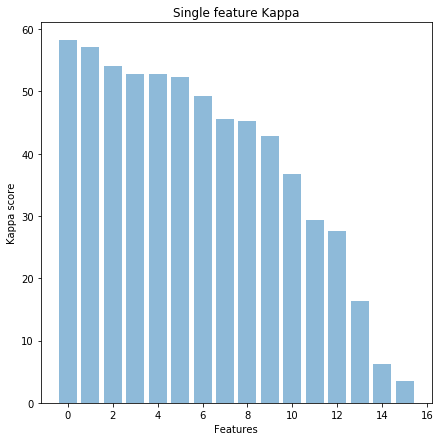

In [9]:
y_pos = np.arange(len(objects))
plt.figure(figsize=(7,7))
plt.bar(y_pos, objects, align='center', alpha=0.5)
plt.ylabel('Kappa score')
plt.xlabel('Features')
plt.title('Single feature Kappa')
plt.show()

In [11]:
#Forward feature selection.
sorted_f = [i[0] for i in sorted_feature_list]
objects = []
results = []
for i in range(1,len(sorted_f)+1):
    forward_feature_list = sorted_f[:i]
    round(float(score)*100,4)
    result = round(float(helper.Evaluate(X_all,y_all,forward_feature_list))*100,4)
    results.append(result)
    objects.append(forward_feature_list)
     
print "Index   Forward Feature list"
for x in range(len(objects)):
    print x,"  ",objects[x]
    print "--------------------------------------------------" 

Index   Forward Feature list
0    ['noun_count']
--------------------------------------------------
1    ['noun_count', 'sentence_count']
--------------------------------------------------
2    ['noun_count', 'sentence_count', 'no_of_domain_words']
--------------------------------------------------
3    ['noun_count', 'sentence_count', 'no_of_domain_words', 'word_count']
--------------------------------------------------
4    ['noun_count', 'sentence_count', 'no_of_domain_words', 'word_count', 'long_word_count']
--------------------------------------------------
5    ['noun_count', 'sentence_count', 'no_of_domain_words', 'word_count', 'long_word_count', 'num_of_characters']
--------------------------------------------------
6    ['noun_count', 'sentence_count', 'no_of_domain_words', 'word_count', 'long_word_count', 'num_of_characters', 'verb_count']
--------------------------------------------------
7    ['noun_count', 'sentence_count', 'no_of_domain_words', 'word_count', 'long_word_co

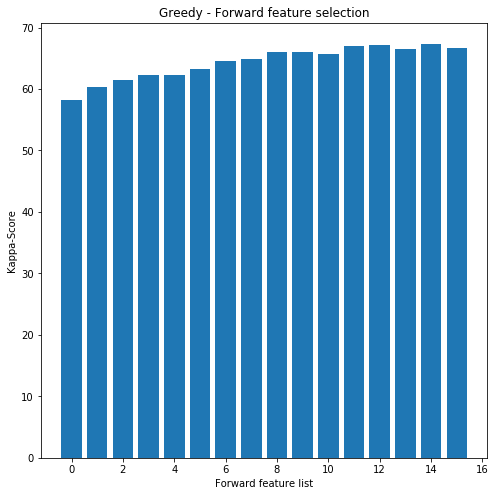

In [13]:
y_pos = np.arange(len(objects))
plt.figure(figsize=(8,8))
plt.bar(y_pos,results)
plt.title('Greedy - Forward feature selection')
plt.ylabel('Kappa-Score')
plt.xlabel('Forward feature list')
plt.show()

In [16]:
# Objects[14] has the highest kappa score as per the bar graph generated. 

selected_features = objects[14]

print helper.Evaluate(X_all,y_all,selected_features)
print helper.Evaluate(X_all,y_all,objects[15])

selected_features

0.671410820146
0.667359082509


['noun_count',
 'sentence_count',
 'no_of_domain_words',
 'word_count',
 'long_word_count',
 'num_of_characters',
 'verb_count',
 'adjective_count',
 'adverb_count',
 'wrong_words',
 'punctuation_count',
 'comma_count',
 'spelling_mistakes',
 'quotation_mark_count',
 'avg_word_length_per_essay']

In [40]:
#Training with Word2Vec
from sklearn.linear_model import LogisticRegression
cv = cross_validation.KFold(len(X_all), n_folds=5,shuffle=True)
results = []

for traincv, testcv in cv:
        X_test, X_train, y_test, y_train = X_all.iloc[testcv], X_all.iloc[traincv], y_all.iloc[testcv], y_all.iloc[traincv]
                
        train_essays = X_train['essay']
        test_essays = X_test['essay']
        #print essays
        sentences = []

        print ("Performing sentence and word tokenizing which will be used for word2vec")

        for essay in train_essays:
            sentences += helper.essay_to_sentences(unicode(essay,"utf-8",errors='ignore'), remove_stopwords = True)

        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

        num_features = 300 
        min_word_count = 40
        num_workers = 4
        context = 10
        downsampling = 1e-3

        #print ("Training w2v model...") 
        model = word2vec.Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)

        model.init_sims(replace=True)

        model_name = "model_and_visualization/300features_40minwords_10context"
        model.save(model_name)

        #print ("Creating average feature vecs for Training Essays")
        clean_train_essays = []
      
        for essay_v in train_essays:
            clean_train_essays.append( helper.essay_to_wordlist( essay_v, remove_stopwords=True ))
        trainDataVecs = helper.getAvgFeatureVecs( clean_train_essays, model, num_features )
        
        clean_test_essays = []
        for essay_v in test_essays:
            clean_test_essays.append( helper.essay_to_wordlist( essay_v, remove_stopwords=True ))
        testDataVecs = helper.getAvgFeatureVecs( clean_test_essays, model, num_features )
        
        #print("Done")

        myOwnTrainFeatureVec = np.array(X_train[selected_features])
        myOwnTestFeatureVec = np.array(X_test[selected_features])
        
        trainDataVecs = np.concatenate((trainDataVecs,myOwnTrainFeatureVec),1)
        testDataVecs = np.concatenate((testDataVecs,myOwnTestFeatureVec),1)
        
        model =  LogisticRegression(penalty='l1',class_weight=None)
        model.fit(trainDataVecs,y_train)
        start = time()
        y_pred = model.predict(testDataVecs)
        end = time()

        #print ("Made predictions in {:.4f} seconds.".format(end - start))
        result = kappa(y_test.values,np.around(y_pred,decimals=2),weights='quadratic')
        print "Kappa: ", result
        results.append(result)

Performing sentence and word tokenizing which will be used for word2vec


2017-05-25 20:36:42,404 : INFO : collecting all words and their counts
2017-05-25 20:36:42,405 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-25 20:36:42,445 : INFO : PROGRESS: at sentence #10000, processed 80652 words, keeping 6931 word types
2017-05-25 20:36:42,488 : INFO : PROGRESS: at sentence #20000, processed 161986 words, keeping 10427 word types
2017-05-25 20:36:42,532 : INFO : PROGRESS: at sentence #30000, processed 242118 words, keeping 13012 word types
2017-05-25 20:36:42,579 : INFO : PROGRESS: at sentence #40000, processed 327104 words, keeping 15816 word types
2017-05-25 20:36:42,624 : INFO : PROGRESS: at sentence #50000, processed 413359 words, keeping 18192 word types
2017-05-25 20:36:42,678 : INFO : PROGRESS: at sentence #60000, processed 498776 words, keeping 20069 word types
2017-05-25 20:36:42,729 : INFO : PROGRESS: at sentence #70000, processed 587605 words, keeping 22615 word types
2017-05-25 20:36:42,732 : INFO : collected 22638

Kappa:  0.947584039231
Performing sentence and word tokenizing which will be used for word2vec


2017-05-25 20:37:31,846 : INFO : collecting all words and their counts
2017-05-25 20:37:31,847 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-25 20:37:31,894 : INFO : PROGRESS: at sentence #10000, processed 81271 words, keeping 7016 word types
2017-05-25 20:37:31,942 : INFO : PROGRESS: at sentence #20000, processed 161736 words, keeping 10549 word types
2017-05-25 20:37:31,987 : INFO : PROGRESS: at sentence #30000, processed 241444 words, keeping 13114 word types
2017-05-25 20:37:32,034 : INFO : PROGRESS: at sentence #40000, processed 326839 words, keeping 15912 word types
2017-05-25 20:37:32,081 : INFO : PROGRESS: at sentence #50000, processed 413009 words, keeping 18149 word types
2017-05-25 20:37:32,122 : INFO : PROGRESS: at sentence #60000, processed 498205 words, keeping 20016 word types
2017-05-25 20:37:32,173 : INFO : collected 22501 word types from a corpus of 586604 raw words and 69992 sentences
2017-05-25 20:37:32,174 : INFO : Loading a fre

Kappa:  0.94954042459
Performing sentence and word tokenizing which will be used for word2vec


2017-05-25 20:38:19,127 : INFO : collecting all words and their counts
2017-05-25 20:38:19,128 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-25 20:38:19,166 : INFO : PROGRESS: at sentence #10000, processed 80290 words, keeping 6914 word types
2017-05-25 20:38:19,212 : INFO : PROGRESS: at sentence #20000, processed 162059 words, keeping 10355 word types
2017-05-25 20:38:19,259 : INFO : PROGRESS: at sentence #30000, processed 242065 words, keeping 12941 word types
2017-05-25 20:38:19,306 : INFO : PROGRESS: at sentence #40000, processed 327467 words, keeping 15885 word types
2017-05-25 20:38:19,350 : INFO : PROGRESS: at sentence #50000, processed 413300 words, keeping 18170 word types
2017-05-25 20:38:19,390 : INFO : PROGRESS: at sentence #60000, processed 498818 words, keeping 20008 word types
2017-05-25 20:38:19,437 : INFO : PROGRESS: at sentence #70000, processed 587220 words, keeping 22448 word types
2017-05-25 20:38:19,440 : INFO : collected 22488

Kappa:  0.950983194187
Performing sentence and word tokenizing which will be used for word2vec


2017-05-25 20:39:07,914 : INFO : collecting all words and their counts
2017-05-25 20:39:07,915 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-25 20:39:07,956 : INFO : PROGRESS: at sentence #10000, processed 81805 words, keeping 6926 word types
2017-05-25 20:39:07,994 : INFO : PROGRESS: at sentence #20000, processed 162115 words, keeping 10371 word types
2017-05-25 20:39:08,035 : INFO : PROGRESS: at sentence #30000, processed 242302 words, keeping 12919 word types
2017-05-25 20:39:08,082 : INFO : PROGRESS: at sentence #40000, processed 327115 words, keeping 15741 word types
2017-05-25 20:39:08,127 : INFO : PROGRESS: at sentence #50000, processed 412384 words, keeping 17968 word types
2017-05-25 20:39:08,171 : INFO : PROGRESS: at sentence #60000, processed 497610 words, keeping 19869 word types
2017-05-25 20:39:08,216 : INFO : PROGRESS: at sentence #70000, processed 586283 words, keeping 22402 word types
2017-05-25 20:39:08,219 : INFO : collected 22438

Kappa:  0.942469598474
Performing sentence and word tokenizing which will be used for word2vec


2017-05-25 20:39:57,821 : INFO : collecting all words and their counts
2017-05-25 20:39:57,822 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-25 20:39:57,852 : INFO : PROGRESS: at sentence #10000, processed 81429 words, keeping 6937 word types
2017-05-25 20:39:57,885 : INFO : PROGRESS: at sentence #20000, processed 162566 words, keeping 10544 word types
2017-05-25 20:39:57,912 : INFO : PROGRESS: at sentence #30000, processed 242517 words, keeping 13132 word types
2017-05-25 20:39:57,942 : INFO : PROGRESS: at sentence #40000, processed 328169 words, keeping 15896 word types
2017-05-25 20:39:57,975 : INFO : PROGRESS: at sentence #50000, processed 413959 words, keeping 18105 word types
2017-05-25 20:39:58,014 : INFO : PROGRESS: at sentence #60000, processed 500461 words, keeping 20103 word types
2017-05-25 20:39:58,051 : INFO : collected 22631 word types from a corpus of 585719 raw words and 69564 sentences
2017-05-25 20:39:58,052 : INFO : Loading a fre

Kappa:  0.950179856088


In [27]:
print "Average Kappa score after a 5-fold cross validation with Word2Vec and custom generated heuristic features is ",np.around(np.array(results).mean(),decimals=4)

Average Kappa score after a 5-fold cross validation with Word2Vec and custom generated heuristic features is  0.9347


In [34]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [36]:
from sklearn.linear_model import Lasso
model = Lasso()